Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.6976 - loss: 0.5204 - val_accuracy: 0.8731 - val_loss: 0.3076
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9155 - loss: 0.2256 - val_accuracy: 0.8453 - val_loss: 0.4668
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9375 - loss: 0.1687 - val_accuracy: 0.8588 - val_loss: 0.3620
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9615 - loss: 0.1106 - val_accuracy: 0.8553 - val_loss: 0.4191
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9690 - loss: 0.0893 - val_accuracy: 0.8583 - val_loss: 0.4520
782/782 - 6s - 7ms/step - accuracy: 0.8583 - loss: 0.4520

Test accuracy: 0.8583


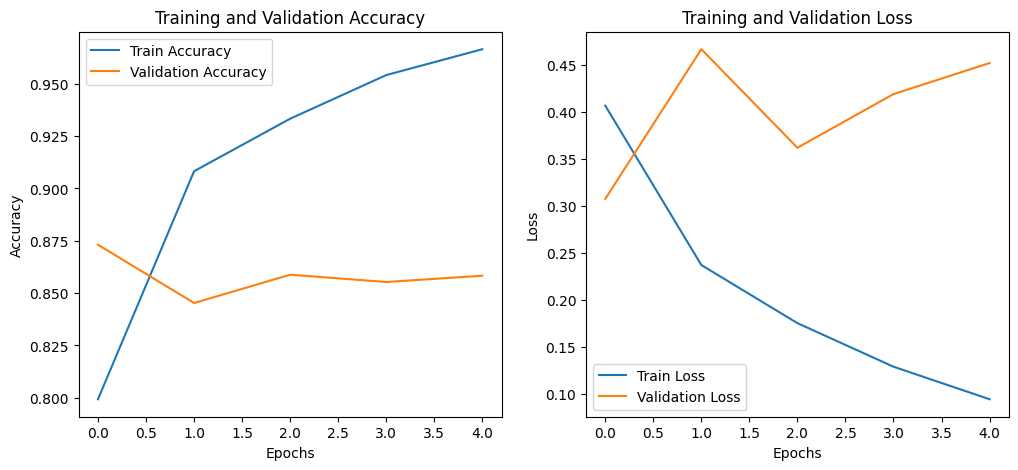

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (IMDB for example)
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input size
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build LSTM model
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=maxlen),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
